-3.96875 3.96875
(78192,)


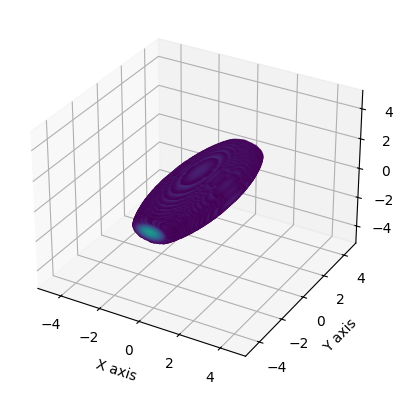

In [45]:
import numpy as np
import matplotlib.pyplot as plt

Nz, Ny, Nx = 128, 128, 128
x = np.linspace(-(Nx - 1), Nx - 1, Nx) / 32
y = np.linspace(-(Ny - 1), Ny - 1, Ny) / 32
z = np.linspace(-(Nz - 1), Nz - 1, Nz) / 32
z, y, x = np.meshgrid(z, y, x, indexing='ij')


print(x.min(), x.max())
field = np.exp(-x**2 - y**2/10 - z**2/0.5)



# Creating a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

threshold_min = 0.1
threshold_max = 0.3
mask = (field >= threshold_min) & (field <= threshold_max)
x = x[mask]
y = y[mask]
z = z[mask]
field = field[mask]

print(field.shape)

ax.scatter(x, y, z, c=field, cmap='viridis')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])



plt.show()


-15.875 15.875
(128, 128, 128)
(919,)


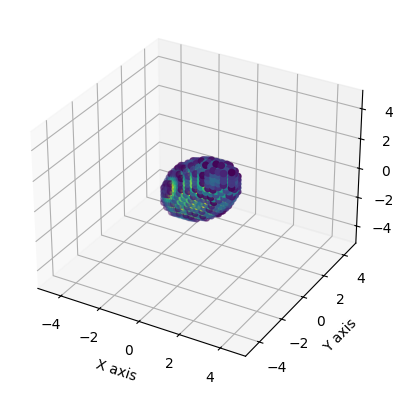

In [277]:
import albumentations as A
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

Nz, Ny, Nx = 128, 128, 128
x = np.linspace(-(Nx - 1), Nx - 1, Nx) / 8
y = np.linspace(-(Ny - 1), Ny - 1, Ny) / 8
z = np.linspace(-(Nz - 1), Nz - 1, Nz) / 8
z, y, x = np.meshgrid(z, y, x, indexing='ij')


print(x.min(), x.max())
field = np.exp(-x**2 - y**2/10 - z**2/0.5)


print(field.shape)
img = deepcopy(field)

random_3d_rotate_transform = A.Compose([A.Rotate(limit=360, always_apply=True)])
img = random_3d_rotate_transform(image=img)['image']
# flip x and y axes and do it again
img = np.transpose(img, (0, 2, 1))

img = random_3d_rotate_transform(image=img)['image']
# get back to (h, w, c)
field = np.transpose(img, (0, 2, 1))



# Creating a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

threshold_min = 0.1
threshold_max = 0.2
mask = (field >= threshold_min) & (field <= threshold_max)
x = x[mask]
y = y[mask]
z = z[mask]
field = field[mask]

print(field.shape)

ax.scatter(x, y, z, c=field, cmap='viridis')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])



plt.show()


